In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import joblib

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset from data/processed/housing_processed.csv
data = pd.read_csv('../data/processed/housing_processed.csv')

# Display the first few rows of the dataset
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-1.329378,1.036503,1.008388,-0.797584,-0.977103,-0.978308,-0.978946,2.960380,-0.704332,-0.015943,2.896019,-0.376789,452600.0
1,-1.324393,1.027200,-0.590487,2.053478,1.347703,0.839604,1.661594,2.945223,-0.704332,-0.015943,2.896019,-0.376789,358500.0
2,-1.334362,1.022548,1.887770,-0.528477,-0.831952,-0.826159,-0.845876,2.280353,-0.704332,-0.015943,2.896019,-0.376789,352100.0
3,-1.339347,1.022548,1.887770,-0.616957,-0.724873,-0.771946,-0.736288,1.252288,-0.704332,-0.015943,2.896019,-0.376789,341300.0
4,-1.339347,1.022548,1.887770,-0.455126,-0.617793,-0.765825,-0.631919,0.107935,-0.704332,-0.015943,2.896019,-0.376789,342200.0


In [3]:
# Separate features and target variable
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [4]:
#Spkit the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Print the shapes of the training and testing sets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (15740, 12), (15740,)
Testing set shape: (3935, 12), (3935,)


In [7]:
# Model training
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
# Predicting on the test set
y_pred = model.predict(X_test)

In [11]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 3913356867.92
R^2 Score: 0.61


In [12]:
# Save the trained model
joblib.dump(model, '../models/linear_regression_model.pkl')
print("Model saved to '../models/linear_regression_model.pkl'")

Model saved to '../models/linear_regression_model.pkl'


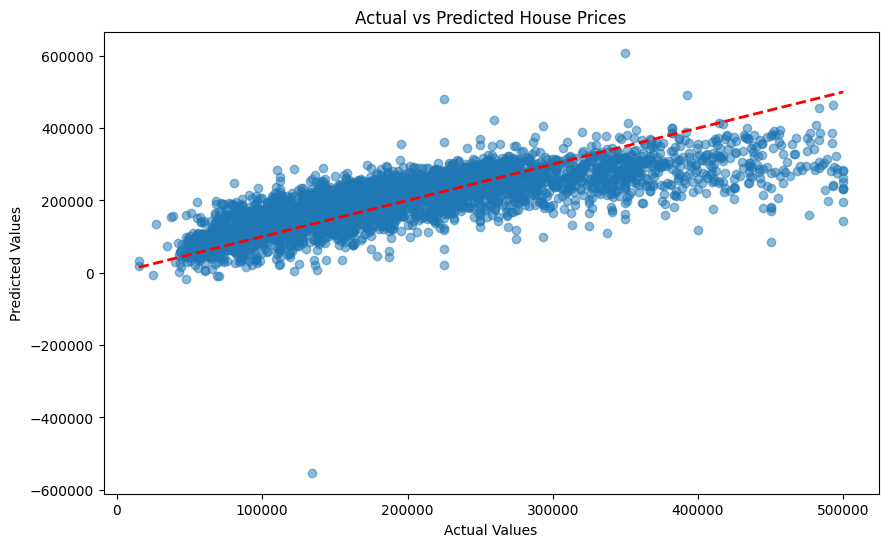

In [13]:
# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted House Prices')
plt.savefig('../results/actual_vs_predicted.png')
plt.show()


In [14]:
#Save evaluation metrics to a text file
with open('../results/evaluation_metrics.txt', 'w') as f:
    f.write(f"Mean Squared Error: {mse:.2f}\n")
    f.write(f"R^2 Score: {r2:.2f}\n")